**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Load Dataset**

In [51]:
df=pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
...,...,...
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [55]:
E=df.iloc[:,0]
E

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
      ... 
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, Length: 30, dtype: float64

In [56]:
S=df.iloc[:,1]
S

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
        ...   
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, Length: 30, dtype: float64

In [57]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Scatter Plot



In [7]:
# Now, we should predict 'salary hike(y)' using 'years of experience(x)'
# It is based on the concept of Straight Line Equation 'y=mx+c', where X=Independent Variable, y=Target Variable
# so, by using Simple Linear Regression we can solve problems related to 'prediction'

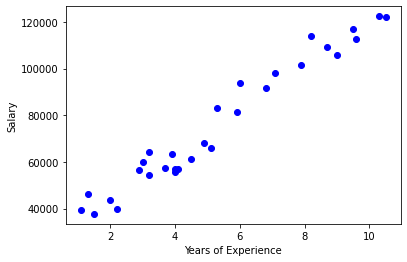

In [58]:
# we use 'Scatter plots' to find the relationship between 2 variables
plt.plot(E,S,"bo")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [9]:
# from above scatter plot, we can see a Positive(+) relationship between two variabes
# Positive 'Linear Assosiation' between (E & S)

# Correlation

In [59]:
# Now, we use 'Correlation' to know the strength of 'Linear Assosiation'
# where 'r'=Correlation Co-efficient, lies between [+1,-1]
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [11]:
#|r|=[0.8-1]---strong correlation, as we have O.978, the strength of the 'LA' is 'Strong'
# Regression Equation-----S=m(E)+c

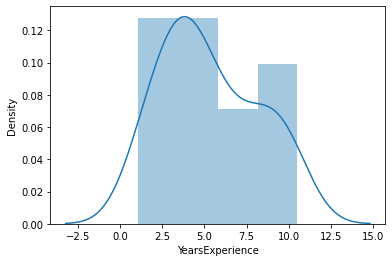

In [60]:
import warnings
warnings.filterwarnings ('ignore')
sb.distplot(E)

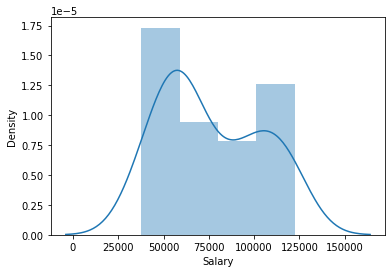

In [61]:
sb.distplot(S)

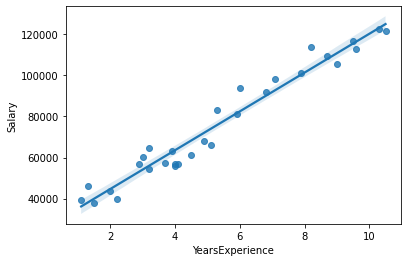

In [62]:
sb.regplot(x=E,y=S)

# Build a Model

In [72]:
import statsmodels.formula.api as smf
model=smf.ols("S~E",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        13:04:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
E           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# In the above model, we got R2 value 95%, which is a great model
# to build a good model, R2 value should be minimum 75%, so we achieved the min %

In [73]:
# Actual Value - Predicted Value = Residual/Noise/Error (can be +/-)
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [74]:
model.params

Intercept    25792.200199
E             9449.962321
dtype: float64

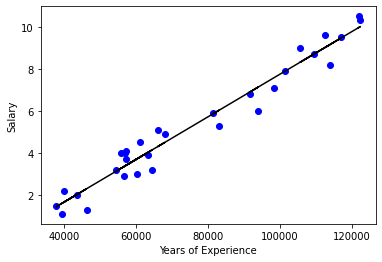

In [68]:
plt.scatter(S,E,color='blue')
plt.plot(S,pred,color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Model Predictions

In [75]:
Y=model.predict()
Y

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [76]:
# Manual prediction for 8 Years Experience
Salary = (25792.200199) + (9449.962321)*(8)
Salary

101391.898767

In [77]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [78]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [ ]:
model.predict(pred_data)